In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [79]:
data_df=pd.read_csv("data.csv")

In [80]:
data_df.head()

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0


In [81]:
data_df.dtypes

year                        int64
customer_id                 int64
phone_no                   object
gender                     object
age                         int64
no_of_days_subscribed       int64
multi_screen               object
mail_subscribed            object
weekly_mins_watched       float64
minimum_daily_mins        float64
maximum_daily_mins        float64
weekly_max_night_mins       int64
videos_watched              int64
maximum_days_inactive     float64
customer_support_calls      int64
churn                     float64
dtype: object

In [82]:
data_df.shape

(2000, 16)

In [83]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    2000 non-null   int64  
 1   customer_id             2000 non-null   int64  
 2   phone_no                2000 non-null   object 
 3   gender                  1976 non-null   object 
 4   age                     2000 non-null   int64  
 5   no_of_days_subscribed   2000 non-null   int64  
 6   multi_screen            2000 non-null   object 
 7   mail_subscribed         2000 non-null   object 
 8   weekly_mins_watched     2000 non-null   float64
 9   minimum_daily_mins      2000 non-null   float64
 10  maximum_daily_mins      2000 non-null   float64
 11  weekly_max_night_mins   2000 non-null   int64  
 12  videos_watched          2000 non-null   int64  
 13  maximum_days_inactive   1972 non-null   float64
 14  customer_support_calls  2000 non-null   

In [84]:
data_df.isnull().sum()

year                       0
customer_id                0
phone_no                   0
gender                    24
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
maximum_days_inactive     28
customer_support_calls     0
churn                     35
dtype: int64

In [85]:
data_df = data_df.drop(columns = 'churn',axis=1)

In [86]:
data_df['gender'].fillna(data_df['gender'].mode(),inplace=True)

In [87]:
print(data_df['maximum_days_inactive'].mode())

0    3.0
Name: maximum_days_inactive, dtype: float64


In [88]:
print(data_df['maximum_days_inactive'].mode()[0])

3.0


In [89]:
data_df['gender'].fillna(data_df['gender'].mode()[0], inplace=True)

In [90]:
data_df['maximum_days_inactive'].fillna(data_df['maximum_days_inactive'].mode()[0], inplace=True)

In [91]:
data_df.isnull().sum()

year                      0
customer_id               0
phone_no                  0
gender                    0
age                       0
no_of_days_subscribed     0
multi_screen              0
mail_subscribed           0
weekly_mins_watched       0
minimum_daily_mins        0
maximum_daily_mins        0
weekly_max_night_mins     0
videos_watched            0
maximum_days_inactive     0
customer_support_calls    0
dtype: int64

In [92]:
data_df.describe()

,year,customer_id,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls
count,2000.0,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,2015.0,554887.157500,38.69050,99.750000,270.178425,10.198700,30.620780,100.415500,4.482500,3.247000,1.547000
std,0.0,261033.690318,10.20641,39.755386,80.551627,2.785519,9.129165,19.529454,2.487728,0.803937,1.315164
min,2015.0,100198.000000,18.00000,1.000000,0.000000,0.000000,0.000000,42.000000,0.000000,0.000000,0.000000
25%,2015.0,328634.750000,32.00000,73.000000,218.212500,8.400000,24.735000,87.000000,3.000000,3.000000,1.000000
50%,2015.0,567957.500000,37.00000,99.000000,269.925000,10.200000,30.590000,101.000000,4.000000,3.000000,1.000000
75%,2015.0,773280.250000,44.00000,127.000000,324.675000,12.000000,36.797500,114.000000,6.000000,4.000000,2.000000
max,2015.0,999961.000000,82.00000,243.000000,526.200000,20.000000,59.640000,175.000000,19.000000,6.000000,9.000000


In [93]:
data_df['no_of_days_subscribed'].value_counts()

86     28
99     26
87     26
93     25
92     24
       ..
186     1
5       1
205     1
191     1
208     1
Name: no_of_days_subscribed, Length: 204, dtype: int64

In [94]:
data_df['weekly_mins_watched'].value_counts()

231.00    7
213.45    6
235.65    6
251.70    5
290.70    5
         ..
179.55    1
414.90    1
236.55    1
181.05    1
178.05    1
Name: weekly_mins_watched, Length: 1260, dtype: int64

In [95]:
data_df['minimum_daily_mins'].value_counts()

11.3    38
9.5     37
11.4    36
11.1    34
10.9    33
        ..
2.2      1
16.7     1
1.3      1
18.2     1
17.0     1
Name: minimum_daily_mins, Length: 149, dtype: int64

In [96]:
data_df['maximum_daily_mins'].value_counts()

26.18    7
24.19    6
26.71    6
28.53    5
32.95    5
        ..
20.35    1
47.02    1
26.81    1
20.52    1
20.18    1
Name: maximum_daily_mins, Length: 1260, dtype: int64

In [97]:
data_df['weekly_max_night_mins'].value_counts()

105    51
102    50
91     48
100    45
93     42
       ..
158     1
51      1
46      1
175     1
44      1
Name: weekly_max_night_mins, Length: 111, dtype: int64

In [98]:
data_df['videos_watched'].value_counts()

3     408
4     354
2     295
5     285
6     201
7     132
1     101
8      70
9      61
10     32
11     19
0      10
12     10
13      8
15      6
14      4
18      2
19      1
16      1
Name: videos_watched, dtype: int64

In [99]:
data_df['maximum_days_inactive'].value_counts()

3.0    973
4.0    645
2.0    273
5.0     85
1.0     12
0.0     10
6.0      2
Name: maximum_days_inactive, dtype: int64

In [100]:
data_df['gender'].value_counts()

Male      1077
Female     923
Name: gender, dtype: int64

In [101]:
sns.set()

<AxesSubplot:xlabel='no_of_days_subscribed', ylabel='count'>

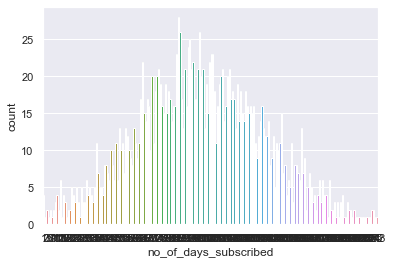

In [102]:
sns.countplot('no_of_days_subscribed', data=data_df)

<AxesSubplot:xlabel='weekly_mins_watched', ylabel='count'>

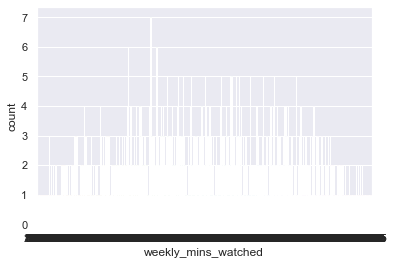

In [103]:
sns.countplot('weekly_mins_watched', data = data_df)

<AxesSubplot:xlabel='minimum_daily_mins', ylabel='count'>

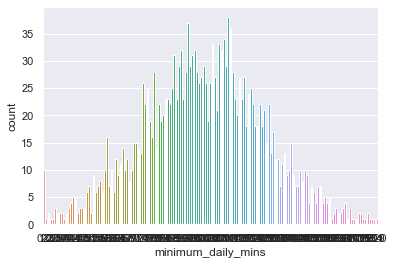

In [104]:
sns.countplot('minimum_daily_mins', data = data_df)

<AxesSubplot:xlabel='maximum_daily_mins', ylabel='count'>

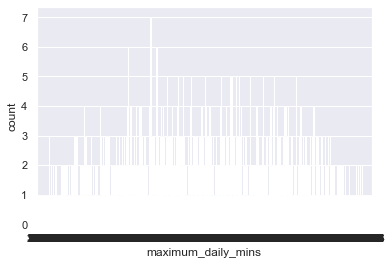

In [105]:
sns.countplot('maximum_daily_mins', data=data_df)


<AxesSubplot:xlabel='weekly_max_night_mins', ylabel='count'>

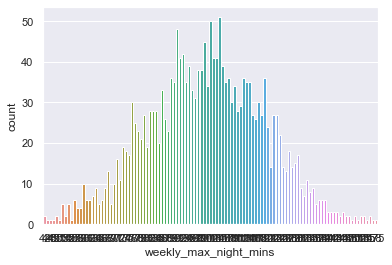

In [106]:
sns.countplot('weekly_max_night_mins', data = data_df)

<AxesSubplot:xlabel='videos_watched', ylabel='count'>

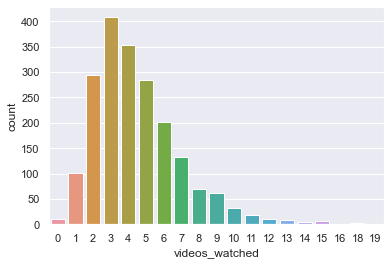

In [107]:
sns.countplot('videos_watched', data = data_df)

<AxesSubplot:xlabel='maximum_days_inactive', ylabel='count'>

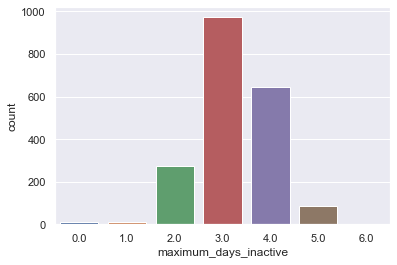

In [108]:
sns.countplot('maximum_days_inactive', data=data_df)

<AxesSubplot:xlabel='gender', ylabel='count'>

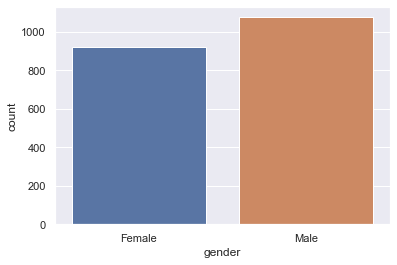

In [109]:
sns.countplot('gender', data=data_df)


<AxesSubplot:xlabel='maximum_days_inactive', ylabel='count'>

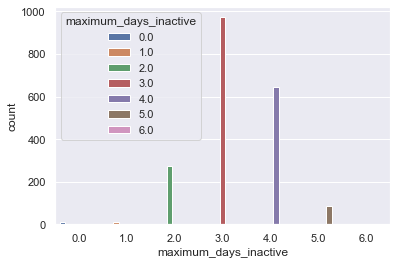

In [110]:
sns.countplot('maximum_days_inactive',hue='maximum_days_inactive',data=data_df)

<AxesSubplot:xlabel='gender', ylabel='count'>

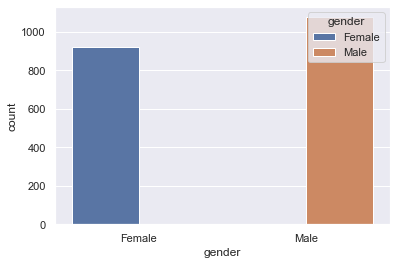

In [111]:
sns.countplot('gender',hue='gender',data=data_df)

In [112]:
data_df['gender'].value_counts()

Male      1077
Female     923
Name: gender, dtype: int64

In [113]:
data_df['multi_screen'].value_counts()

no     1802
yes     198
Name: multi_screen, dtype: int64

In [114]:
data_df['mail_subscribed'].value_counts()


no     1430
yes     570
Name: mail_subscribed, dtype: int64

In [115]:
data_df.replace({'gender':{'Male':0, 'Female':1}, 'multi_screen':{'no':0, 'yes':1},'mail_subscribed':{'no':0, 'yes':1}}, inplace=True)


In [116]:
data_df.head()

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls
0,2015,100198,409-8743,1,36,62,0,0,148.35,12.2,16.81,82,1,4.0,1
1,2015,100643,340-5930,1,39,149,0,0,294.45,7.7,33.37,87,3,3.0,2
2,2015,100756,372-3750,1,65,126,0,0,87.30,11.9,9.89,91,1,4.0,5
3,2015,101595,331-4902,1,24,131,0,1,321.30,9.5,36.41,102,4,3.0,3
4,2015,101653,351-8398,1,40,191,0,0,243.00,10.9,27.54,83,7,3.0,1


In [117]:
X = data_df.drop(columns = ['customer_id','phone_no' ,'age','multi_screen','customer_support_calls'])
Y = data_df['maximum_days_inactive']

In [118]:
print(X)

      year  gender  no_of_days_subscribed  mail_subscribed  \
0     2015       1                     62                0   
1     2015       1                    149                0   
2     2015       1                    126                0   
3     2015       1                    131                1   
4     2015       1                    191                0   
...    ...     ...                    ...              ...   
1995  2015       1                     75                1   
1996  2015       0                    127                0   
1997  2015       0                     94                0   
1998  2015       0                     94                0   
1999  2015       0                     73                0   

      weekly_mins_watched  minimum_daily_mins  maximum_daily_mins  \
0                  148.35                12.2               16.81   
1                  294.45                 7.7               33.37   
2                   87.30                11.9   

In [119]:
print(Y)

0       4.0
1       3.0
2       4.0
3       3.0
4       3.0
       ... 
1995    4.0
1996    3.0
1997    5.0
1998    3.0
1999    3.0
Name: maximum_days_inactive, Length: 2000, dtype: float64


In [120]:
X_train, X_test, Y_train , Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [121]:
print(X.shape, X_train.shape , X_test.shape)

(2000, 10) (1600, 10) (400, 10)


In [122]:
model = LogisticRegression()

In [123]:
model.fit(X_train,Y_train)

LogisticRegression()

In [148]:
X_train_prediction = model.predict(X_train)
X_test_prediction = model.predict(X_test)

In [149]:
print(X_train_prediction)


[3. 3. 4. ... 3. 3. 3.]


In [150]:
training_data_accuracy = accuracy_score(Y_train,X_train_prediction)
print('Accuracy score of training data :', training_data_accuracy)


Accuracy score of training data : 0.611875


In [151]:
from sklearn.metrics import confusion_matrix

In [152]:
cf_matrix= confusion_matrix(Y_test,X_test_prediction)
print(cf_matrix)

[[  0   0   0   4   0   0]
 [  0   0   0   2   0   0]
 [  0   0   0  54   0   0]
 [  0   0   0 185   5   0]
 [  0   0   0  79  55   0]
 [  0   0   0   0  16   0]]
